# Network growth models pt 1


A graph is a mathematical object consisting of a set of nodes $N=\{1,...,N\}$ connected by means of a set of edges, when an edge between two nodes $i$ and $j$ exists it is indicated as $g_{ij}=1$, otherwise it is $g_{ij}=0$ if there is no edge between the two nodes. A Network is instead an abstract idea which refers to a system of interconnected entities. It may, as any real world data representation, be reduced to a graph in order to visually understand the properties of the networks of interest.

From the observations of growth processes, we know that a network starts as a small set of nodes connected by edges and then after every iteration more nodes are introduced and new connections are made. An example of algorithm for generating scale-free networks is the Barabasi - Albert model and it uses a preferential attachment mechanism. Preferential attachment is an example of a positive feedback cycle where initially random variations (one node initially having more edges or having started accumulating edges earlier than another) are automatically reinforced, consequently greatly magnifying differences. \\

In practice, this model can describe species distribution, popularity in cultural systems like books and music, growth of technical systems like websites, growth of cities and so on.

In [1]:
# Load some packages
import numpy as np
import matplotlib.pyplot as plt
import random 
from random import choices
import operator
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import powerlaw

from scipy.stats import powerlaw
from scipy.stats import ks_2samp

In [2]:
import import_ipynb
from FunzioniVarie import trianngles,degree,truncated_power_law

importing Jupyter notebook from FunzioniVarie.ipynb


Clustering happens when nodes are grouped in such a way that they share the same characteristics, this property is also known as network transitivity. In fact, the transitivity property implies that if node A is connected to node B and if node B is connected to node C, then node A is also likely to be connected to node C.



## Barabasi-Albert network model

When growing a Barabasi-Albert network, new nodes are entering the network over time, but the way these are connected to previous nodes depend on the the degree of the already existing nodes. This is way we start with an initial configuration of the network composed of n0 = 30 nodes: in this way the existing nodes randomly acquire an ”advantage in degree” over other nodes and this random advantage then leads them to become the nodes with the highest degree in the entire network. In practice, the growth of the network is simulated in the following way:
1. initial nodes positions are generated in a cube of dimensions [0,1) x [0,1) x [0,1) 
2. initial connectivity should be such that all initial nodes are connected;
3. new nodes are added one at a time and they are connected to one of the existing nodes by taking into consideration the degree of the already existing nodes;
4. the process continues until the last node is added.
In the graph below, it is shown a network in which n = 500 new nodes are gradually inserted and connected by means of preferential attachment:

In [3]:
def rich_get_richer(n0 = 30, n = 100, seed = 184937, graph=True, info=True):
    if seed is not None:
        np.random.seed(seed)
        
    # generate the nodes positions in [0,1)x[0,1)
    x = np.random.uniform(low=0, high=1, size=(n0,)) # random array, elements in [0,1), length n
    y = np.random.uniform(low=0, high=1, size=(n0,)) # same....
    z = np.random.uniform(low=0, high=1, size=(n0,))

    # connectivity should be such that all vertices are connected
    conn = np.arange(30)
    np.random.shuffle(conn)
    
    if graph== True:
        fig = plt.figure(figsize=(10,8));
        ax = Axes3D(fig);
    
        for j,k,l,i in zip(x,y,z,range(len(x))):
            ax.text(j,k,l,i);
        
        for i in range(len(x)):
            ax.plot([x[i],x[conn[i]]], [y[i],y[conn[i]]], [z[i],z[conn[i]]])
        ax.scatter3D(x, y, z,s=40, cmap='Greens');
        plt.show()

    conn=list(conn)
    weight =conn
    for i in range(n):
        # create a random node
        new_x= np.random.uniform(low=0, high=1)
        new_y= np.random.uniform(low=0, high=1)
        new_z= np.random.uniform(low=0, high=1)

        x = np.append(x,new_x) #append the x coordinate of the new node
        y = np.append(y,new_y) #append the y coordinate of the new node
        z = np.append(z,new_z)

        deg = degree(conn)
        
        new_conn = np.random.choice(weight) # weighted choice (wrt to the degree of each node) among existing nodes
        
        conn.append(new_conn) #append the existing node to which the new node will connect
        weight.append(n0+i)
        
        plt.clf()
    if graph== True:
        fig = plt.figure(figsize=(10,8));
        ax = Axes3D(fig);
            
        for j,k,l,i in zip(x,y,z,range(len(x))):
            ax.text(j,k,l,i);
            
        for i in range(len(x)):
            ax.plot([x[i],x[conn[i]]], [y[i],y[conn[i]]], [z[i],z[conn[i]]])
        ax.scatter(x, y, z, cmap='hsv');

        fig = plt.figure(figsize=(10,6));
        
    deg =degree(conn)
    deg = [int(i) for i in deg] 
    index, value = max(enumerate(deg), key=operator.itemgetter(1))
    if info == True:
        sns.countplot(deg)
        plt.show()
    
        print("Node with highest degree is:", index)
    return deg

### TRIAL 1

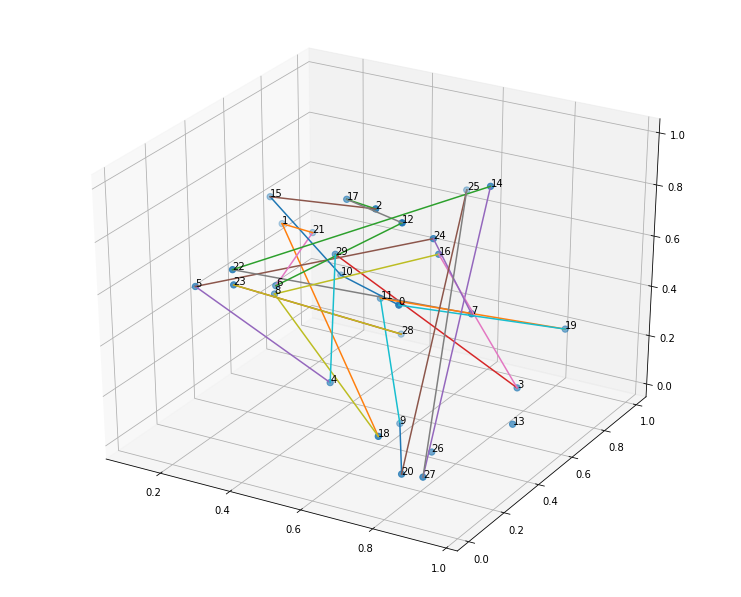

<Figure size 432x288 with 0 Axes>

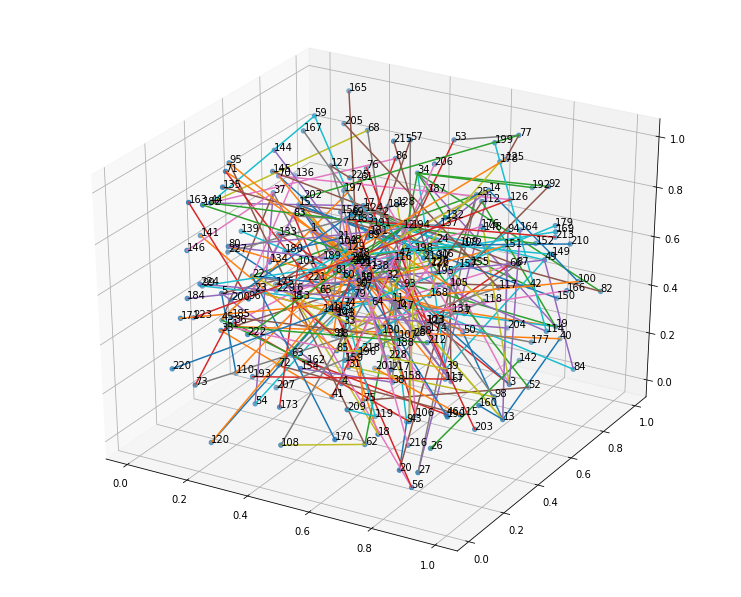

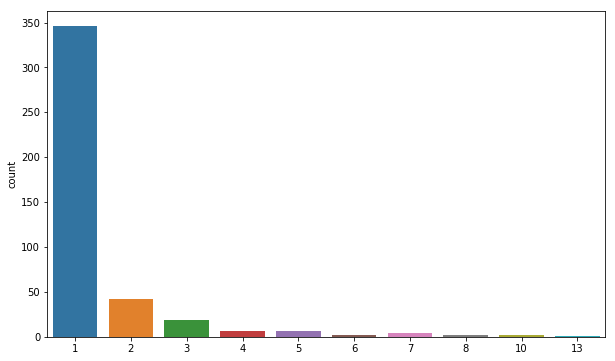

Node with highest degree is: 12


In [4]:
deg=rich_get_richer(n=200)

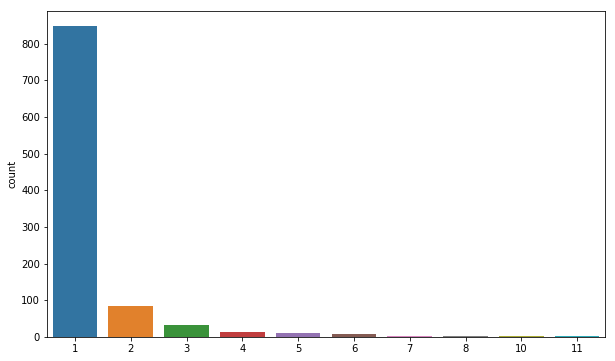

In [5]:
sample = truncated_power_law(2.5,13,1000)
fig = plt.figure(figsize=(10,6))
sns.countplot(sample)
plt.show()

In [6]:
ks_2samp(sample,deg)

Ks_2sampResult(statistic=0.04334883720930227, pvalue=0.6151013213608522)

To verify whether or not it is reasonable to assume that the random sample of degrees comes from a specific distribution, which is the power-law, the two-sample Kolmogorov-Smirnov test is used. If the K-S statistic is large or the p-value is lowe (smaller than the significance level, say 5%), then we  reject the hypothesis that the distributions of the two samples are the same. In this case, we reject the null hypothesis.

### TRIAL 2

Let's try with a larger growing network, with 1000 new nodes added

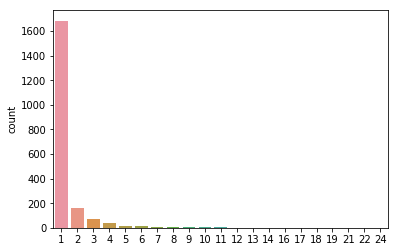

Node with highest degree is: 19


In [7]:
deg_2=rich_get_richer(n=1000, graph=False, info =True)

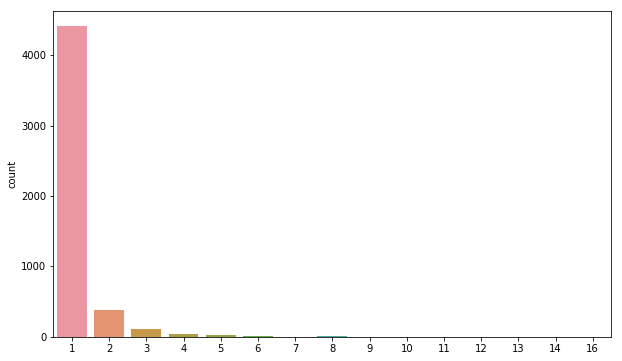

In [8]:
sample_2 = truncated_power_law(12/4,25,5000)
fig = plt.figure(figsize=(10,6))
sns.countplot(sample_2)
plt.show()

In [9]:
ks_2samp(sample_2,deg_2)

Ks_2sampResult(statistic=0.05264334975369456, pvalue=0.0006354103511486179)

It is clear that the degree distribution of this network follows a power-law distribution. However, it is advisable to check this hypothesis on a larger sample. Here are the results from a sample of 100 networks grown with 1000 new nodes each:

In [11]:
tot=0
total = 300
while total > 0:
    d= rich_get_richer(seed=None,graph=False,info=False)
    sample_2=truncated_power_law(13/4,25,5000)
    if ks_2samp(sample_2,d)[1]<=0.05:
        tot+=1
    total -=1
print("Percentage of rejected: {i}%".format(i=(tot/300)*100))

Percentage of rejected: 85.66666666666667%


Out of 300 Albert-Barabasi networks with 1000, we have that the 85.67% have a degree distribution which follows a powerlae distribution. Most probably, this percentage increases as the number of nodes in the network grows larger